# Price Estimator Model for Carpooling App

This notebook creates a price estimator model using linear regression with the trajets.csv dataset.

## Import Required Libraries

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Load Dataset

In [11]:
# Load the trajets.csv dataset
try:
    df = pd.read_csv("../data/trajets.csv")
    print("Dataset successfully loaded!")
    
    # Display the first few rows
    print("\nFirst 5 rows of the dataset:")
    display(df.head())
    
    # Display basic information about the dataset
    print("\nDataset information:")
    print(f"Number of records: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")
    print("\nColumn data types:")
    print(df.dtypes)
    
    # Check for missing values
    print("\nMissing values:")
    print(df.isnull().sum())
    
except FileNotFoundError:
    print("Error: trajets.csv file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset successfully loaded!

First 5 rows of the dataset:


,depart,destination,dateDepart,placesDisponibles,prix
0,Sousse,Kairouan,2025-05-13T09:01:37.000+00:00,4,12.02
1,Bizerte,Gafsa,2025-05-11T19:12:50.000+00:00,6,23.53
2,Sousse,Bizerte,2025-05-04T21:12:57.000+00:00,6,12.36
3,Sfax,Tunis,2025-05-09T02:23:35.000+00:00,2,12.16
4,Gabès,Bizerte,2025-05-28T05:24:38.000+00:00,2,10.65



Dataset information:
Number of records: 500
Number of features: 5

Column data types:
depart                object
destination           object
dateDepart            object
placesDisponibles      int64
prix                 float64
dtype: object

Missing values:
depart               0
destination          0
dateDepart           0
placesDisponibles    0
prix                 0
dtype: int64


## Data Exploration and Preprocessing

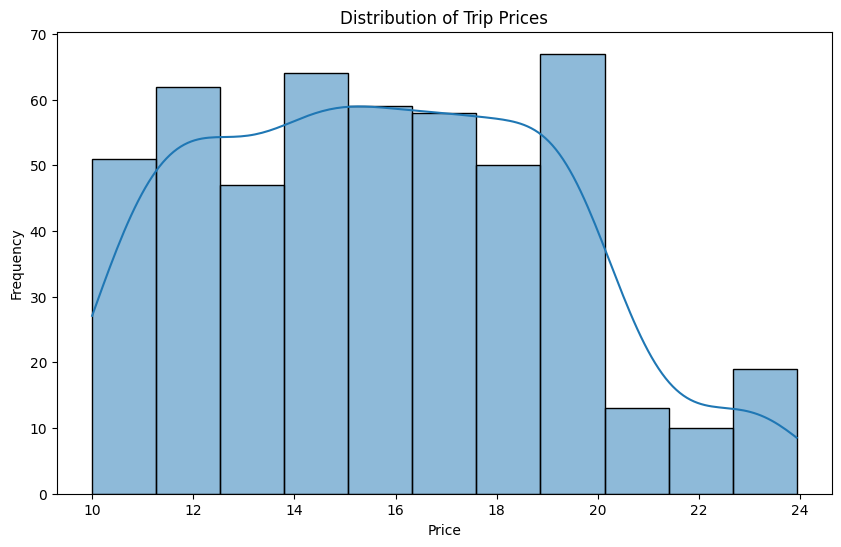

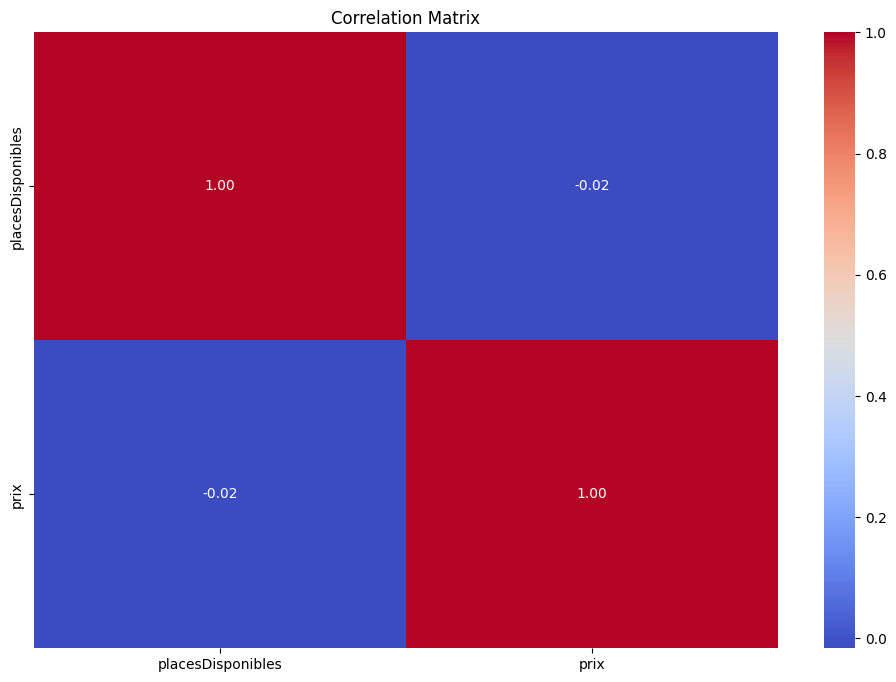

Selected features for modeling: ['placesDisponibles']
Target variable: prix


In [12]:
# Explore the distribution of the price column
plt.figure(figsize=(10, 6))
sns.histplot(df['prix'], kde=True)
plt.title('Distribution of Trip Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Check correlation between features
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Prepare the data for modeling
# Select relevant features (adjust these based on your actual dataset columns)
# Assuming the dataset has columns like 'distance', 'duration', etc.
features = ['placesDisponibles']  # Modify this based on your actual data
target = 'prix'

# Make sure all selected features exist in the dataset
features = [f for f in features if f in df.columns]

if not features:
    print("Error: None of the specified features exist in the dataset.")
    print("Available columns:", df.columns.tolist())
else:
    print(f"Selected features for modeling: {features}")
    print(f"Target variable: {target}")

# Create X (features) and y (target)
X = df[features]
y = df[target]

## Train Linear Regression Model

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display sample of actual vs predicted prices
results_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred,
    'Difference': y_test.values - y_pred
})

print("\nSample of actual vs predicted prices:")
display(results_df.head(10))

Training set size: 400 samples
Testing set size: 100 samples

Model Coefficients:
placesDisponibles: -0.0859
Intercept: 15.9872

Sample of actual vs predicted prices:


,Actual Price,Predicted Price,Difference
0,17.44,15.557802,1.882198
1,13.35,15.729542,-2.379542
2,16.90,15.901282,0.998718
3,10.05,15.815412,-5.765412
4,18.04,15.815412,2.224588
5,15.56,15.815412,-0.255412
6,14.74,15.557802,-0.817802
7,17.87,15.471932,2.398068
8,18.69,15.901282,2.788718
9,17.61,15.815412,1.794588


## Evaluate Model Accuracy

Model Performance Metrics:
Mean Squared Error (MSE): 10.8190
Root Mean Squared Error (RMSE): 3.2892
R-squared (R²): -0.0213


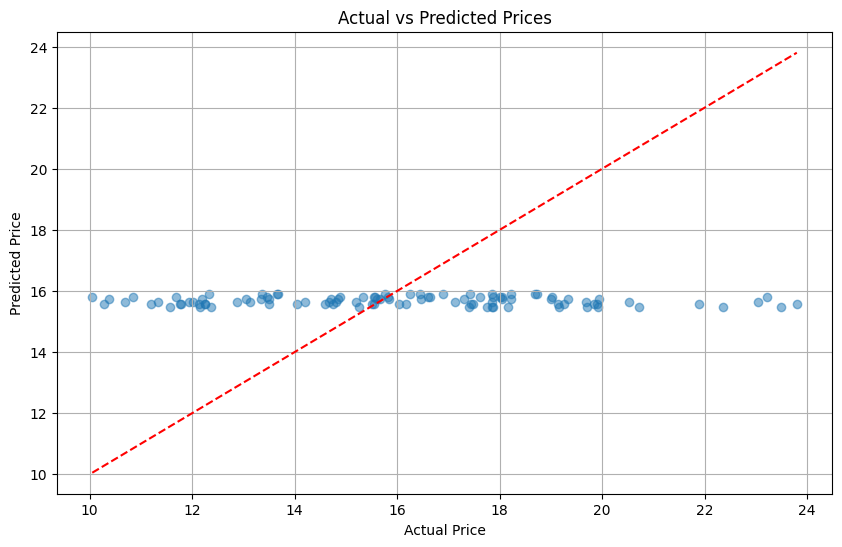

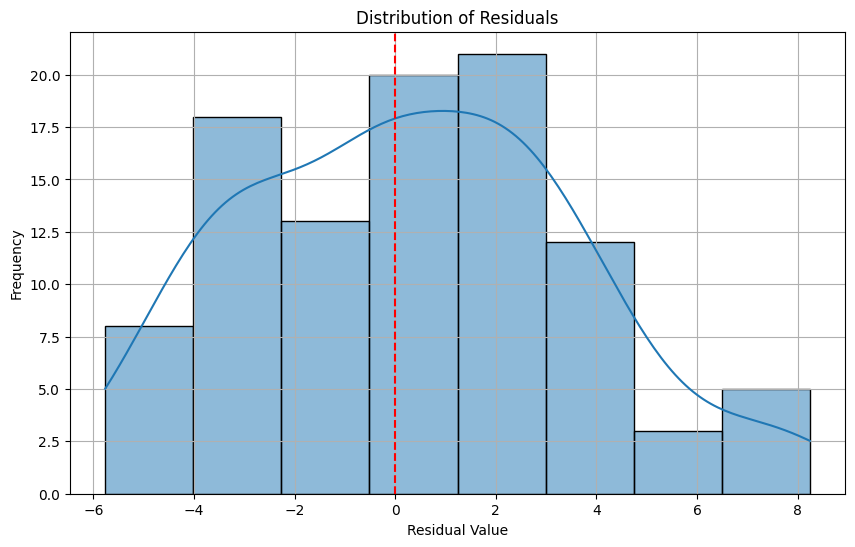

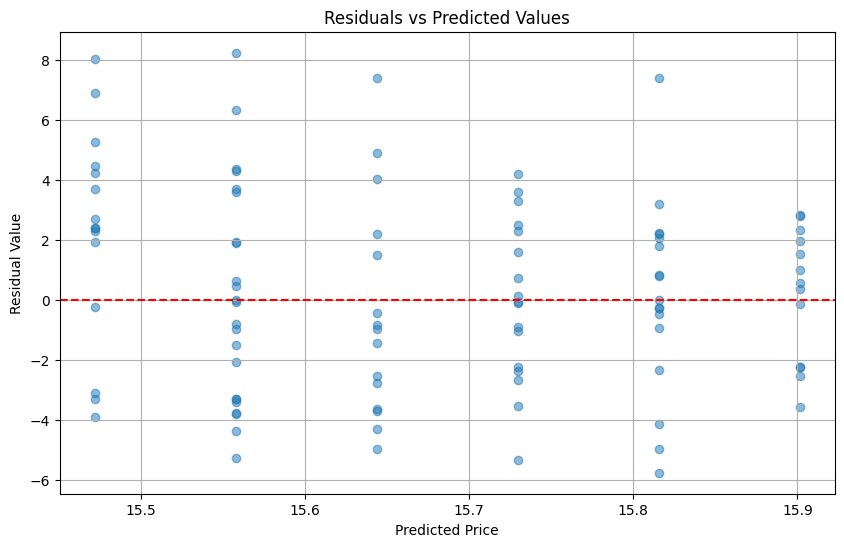

In [14]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

# Plot residuals vs predicted values to check for heteroscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residual Value')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

## Save Model as .pkl File

In [15]:
import os

# Nouveau dossier où sauvegarder le modèle
model_dir = 'service-ia'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"Created directory: {model_dir}")

# Chemin du fichier .pkl dans la racine de service-ia/
model_filename = os.path.join(model_dir, 'price_estimator_model.pkl')

# Sauvegarde du modèle
joblib.dump(model, model_filename)
print(f"Model successfully saved as: {model_filename}")

# Fonction d’estimation (mise à jour pour correspondre à tes vraies features)
def estimate_price(places_disponibles):
    """
    Estimate the price of a trip given number of available places.
    
    Args:
        places_disponibles: Number of available seats (int)
    
    Returns:
        The estimated price
    """
    # Charger le modèle
    loaded_model = joblib.load(model_filename)
    
    # Créer l'entrée
    features = np.array([[places_disponibles]])
    
    # Prédire
    predicted_price = loaded_model.predict(features)[0]
    
    return predicted_price

# Test
test_places = 3
estimated_price = estimate_price(test_places)
print(f"\nEstimated price for a trip with {test_places} places disponibles: {estimated_price:.2f}")


Created directory: service-ia
Model successfully saved as: service-ia/price_estimator_model.pkl

Estimated price for a trip with 3 places disponibles: 15.73


/home/abdou/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Conclusion

This notebook demonstrates how to:
1. Load and explore the trajets.csv dataset
2. Train a linear regression model to estimate trip prices
3. Evaluate the model's performance
4. Save the model for future use in our carpooling application

The saved model can now be integrated into the application to provide real-time price estimates for users.